# Aim

In 'Religion_1_SO.ipynb' we focused on adding some new data to explore the relationship between SO non-response and the % of Non-English speakers in our LA's. However, in this notebook, we will now dive deeper into our religion dataset to explore the relationship between religious group % and contribution to non-response rates in LAs. Our aim will be to create some scatterplots.

# Religion

## Import libraries

In [1]:
# used to manipulate dataframes
import pandas as pd

# used to create visualisations
import matplotlib.pyplot as plt

# used to create interactive visualisations
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, TableColumn

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Read-in data

In [2]:
rel = pd.read_excel('../Data/religion_so.xlsx')

## Clean data

In [3]:
# Let's rename our columns and give them less clunky names

rel.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Sexual orientation (6 categories) Code': 'SO_code', 'Sexual orientation (6 categories)': 'SO_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)

In [4]:
# Filter dataframe so that we don't include 'Does not apply' categories
# These categories have counts of 0
# We'll also get rid of the non-response category for religion 

rel = rel[(rel.SO_code != -8) & (rel.Religion_code != -8) & (rel.Religion_code != 9)]

In [5]:
# Let's check it out

rel.head(10)

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation
11,E06000001,Hartlepool,1,Straight or Heterosexual,1,No religion,25028
12,E06000001,Hartlepool,1,Straight or Heterosexual,2,Christian,39649
13,E06000001,Hartlepool,1,Straight or Heterosexual,3,Buddhist,139
14,E06000001,Hartlepool,1,Straight or Heterosexual,4,Hindu,144
15,E06000001,Hartlepool,1,Straight or Heterosexual,5,Jewish,15
16,E06000001,Hartlepool,1,Straight or Heterosexual,6,Muslim,675
17,E06000001,Hartlepool,1,Straight or Heterosexual,7,Sikh,112
18,E06000001,Hartlepool,1,Straight or Heterosexual,8,Other religion,175
21,E06000001,Hartlepool,2,Gay or Lesbian,1,No religion,677
22,E06000001,Hartlepool,2,Gay or Lesbian,2,Christian,384


# Pre-processing

What we want to do is caclulate the total observation for each LA, regardless of religious category. Then we will calculate the non-response total for each religious category within each LA, and divide it by the total observations for the LA.

This will allow us to move onto the data processing phase where we can explore how different religious categories contribute to the overall non-response rates of our LA's. We can then look at which groups have a larger impact on overall NR, especially in LAs where they make up a larger % of the population.

## Step 1

Calculate the % of each religious group for each LA.

In [6]:

# We will group by LA name and observation, then sum the counts
# Column name for this new df will be 'Total_Observation'
total_population = rel.groupby('LA_name')['Observation'].sum().reset_index(name='Total_Observation')

# Create a dataframe to store the results
final_df = total_population.copy()

# Iterate through each unique religion category
for rel_category in rel['Religion_categories'].unique():
    
#     Subset dataframe by that religious category and assign results to new df
    spec = rel[rel.Religion_categories == rel_category]
    
#     Create a new df which holds the total observations for that religious category
# ..within each LA
    spec_tot = spec.groupby('LA_name')['Observation'].sum().reset_index(name=f'{rel_category}_Observation')
#     Then calculate the % of each religious group by dividing category observation by total LA population
    spec_tot[f'{rel_category}_Percentage'] = (spec_tot[f'{rel_category}_Observation'] / total_population['Total_Observation'] * 100).round(2)
#     Merge df where we will store results with spec_tot 
    final_df = pd.merge(final_df, spec_tot[['LA_name', f'{rel_category}_Percentage', f'{rel_category}_Observation']], on = 'LA_name', how = 'left')

# Print the final_df to see the results
final_df


,LA_name,Total_Observation,No religion_Percentage,No religion_Observation,Christian_Percentage,Christian_Observation,Buddhist_Percentage,Buddhist_Observation,Hindu_Percentage,Hindu_Observation,Jewish_Percentage,Jewish_Observation,Muslim_Percentage,Muslim_Observation,Sikh_Percentage,Sikh_Observation,Other religion_Percentage,Other religion_Observation
0,Adur,49935,47.51,23725,49.18,24556,0.51,256,0.34,169,0.43,216,1.23,615,0.07,33,0.73,365
1,Allerdale,75914,33.10,25129,65.88,50010,0.27,205,0.08,57,0.04,33,0.23,175,0.03,20,0.38,285
2,Amber Valley,99179,46.62,46233,51.74,51318,0.26,261,0.18,179,0.06,55,0.25,246,0.20,202,0.69,685
3,Arun,131265,39.56,51925,58.34,76574,0.36,468,0.23,303,0.19,246,0.66,866,0.05,61,0.63,822
4,Ashfield,96859,49.49,47936,48.56,47038,0.24,235,0.32,313,0.04,39,0.53,517,0.23,222,0.58,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Wrexham,103237,41.62,42968,56.16,57981,0.35,361,0.26,264,0.05,50,1.04,1077,0.06,66,0.46,470
327,Wychavon,104730,34.63,36263,63.55,66551,0.30,311,0.15,160,0.10,105,0.54,567,0.24,256,0.49,517
328,Wyre,89649,32.76,29367,65.81,58994,0.31,280,0.14,128,0.09,80,0.37,336,0.02,19,0.50,445
329,Wyre Forest,79812,37.88,30229,60.03,47914,0.27,213,0.14,113,0.05,39,0.83,662,0.26,206,0.55,436


## Step 2

Calculate the non-response rate contributions for each religious group for each LA.

In [7]:
# Start by creating a new df which subsets our original df according to our condition

non_response_data = rel[rel.SO_categories == 'Not answered']

In [8]:
# Calculate total non-response counts for each religious category by grouping observations

non_resp_totals = non_response_data.groupby(['LA_name', 'Religion_categories'])['Observation'].sum().reset_index(name='Non_Response_Observation')


In [9]:
# Let's check it out...

non_resp_totals.head()

,LA_name,Religion_categories,Non_Response_Observation
0,Adur,Buddhist,19
1,Adur,Christian,1023
2,Adur,Hindu,9
3,Adur,Jewish,7
4,Adur,Muslim,27


In [10]:
# Create a copy of non_resp_totals to store the results
non_resp_results = non_resp_totals.copy()

# Merge the Non_Response_Observation and Total_Observation columns
merged_df = pd.merge(non_resp_totals, final_df[['LA_name', 'Total_Observation']], on='LA_name', how='left')


In [11]:
merged_df.head()

,LA_name,Religion_categories,Non_Response_Observation,Total_Observation
0,Adur,Buddhist,19,49935
1,Adur,Christian,1023,49935
2,Adur,Hindu,9,49935
3,Adur,Jewish,7,49935
4,Adur,Muslim,27,49935


In [12]:
# Calculate the non-response percentage for each religion category

merged_df['NR_Percentage'] = (merged_df['Non_Response_Observation'] / merged_df['Total_Observation'] * 100).round(2)

In [13]:
# Pivot the dataframe to create the columns for each religion category

pivot_df = pd.pivot_table(merged_df, values='NR_Percentage', index='LA_name', columns='Religion_categories', fill_value=0)

In [14]:
# Looking good, all we need to do now is fix our column names
# We want them suffixed by _NR

pivot_df.head()

Religion_categories,Buddhist,Christian,Hindu,Jewish,Muslim,No religion,Other religion,Sikh
LA_name,,,,,,,,
Adur,0.04,2.05,0.02,0.01,0.05,2.12,0.04,0.00
Allerdale,0.02,2.54,0.00,0.01,0.03,1.33,0.04,0.00
Amber Valley,0.02,2.42,0.01,0.00,0.01,1.90,0.05,0.02
Arun,0.03,2.69,0.03,0.01,0.04,1.82,0.07,0.00
Ashfield,0.02,2.29,0.04,0.00,0.05,2.11,0.05,0.02


In [15]:
pivot_df.columns = [f'{col}_NR' for col in pivot_df.columns]

pivot_df.head()

,Buddhist_NR,Christian_NR,Hindu_NR,Jewish_NR,Muslim_NR,No religion_NR,Other religion_NR,Sikh_NR
LA_name,,,,,,,,
Adur,0.04,2.05,0.02,0.01,0.05,2.12,0.04,0.00
Allerdale,0.02,2.54,0.00,0.01,0.03,1.33,0.04,0.00
Amber Valley,0.02,2.42,0.01,0.00,0.01,1.90,0.05,0.02
Arun,0.03,2.69,0.03,0.01,0.04,1.82,0.07,0.00
Ashfield,0.02,2.29,0.04,0.00,0.05,2.11,0.05,0.02


In [16]:
# Merge the pivot_df with the final_df, which we created in phase 1
# Reset index too

final_df = pd.merge(final_df, pivot_df.reset_index(), on='LA_name', how='left')

In [17]:
# Nice! Now we can create some scatterplots

final_df.head()

,LA_name,Total_Observation,No religion_Percentage,No religion_Observation,Christian_Percentage,Christian_Observation,Buddhist_Percentage,Buddhist_Observation,Hindu_Percentage,Hindu_Observation,...,Other religion_Percentage,Other religion_Observation,Buddhist_NR,Christian_NR,Hindu_NR,Jewish_NR,Muslim_NR,No religion_NR,Other religion_NR,Sikh_NR
0,Adur,49935,47.51,23725,49.18,24556,0.51,256,0.34,169,...,0.73,365,0.04,2.05,0.02,0.01,0.05,2.12,0.04,0.00
1,Allerdale,75914,33.10,25129,65.88,50010,0.27,205,0.08,57,...,0.38,285,0.02,2.54,0.00,0.01,0.03,1.33,0.04,0.00
2,Amber Valley,99179,46.62,46233,51.74,51318,0.26,261,0.18,179,...,0.69,685,0.02,2.42,0.01,0.00,0.01,1.90,0.05,0.02
3,Arun,131265,39.56,51925,58.34,76574,0.36,468,0.23,303,...,0.63,822,0.03,2.69,0.03,0.01,0.04,1.82,0.07,0.00
4,Ashfield,96859,49.49,47936,48.56,47038,0.24,235,0.32,313,...,0.58,559,0.02,2.29,0.04,0.00,0.05,2.11,0.05,0.02


# Data processing

Let's create some visualisations.

## Matplotlib

Before we work with Bokeh, let's just see a matplotlib example.

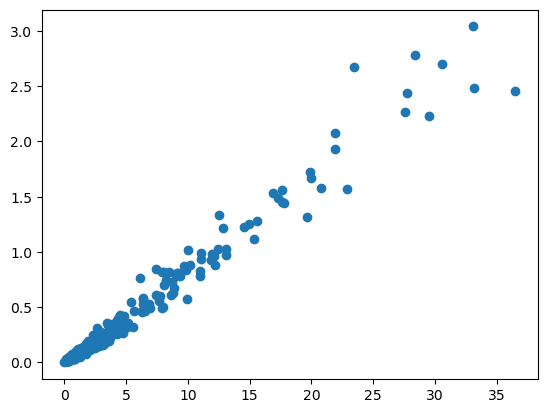

In [18]:
plt.scatter(final_df['Muslim_Percentage'], final_df['Muslim_NR'])

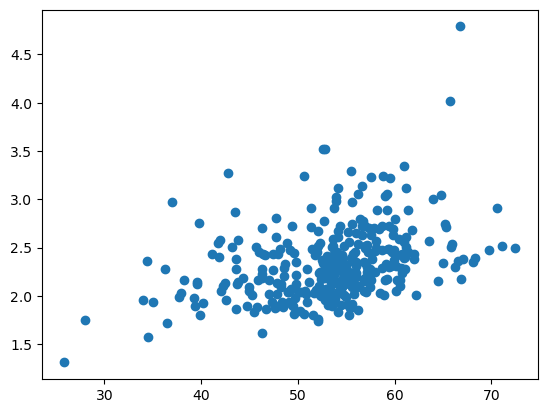

In [19]:
plt.scatter(final_df['Christian_Percentage'], final_df['Christian_NR'])

## Bokeh

Let's see if we can make a standalone Bokeh plot for some of this data.

In [20]:
# Bokeh has a hover tool, allowing you to scroll over dps to reveal info
# To configure the tool, we must set our tooltips arguments...

# We simply define a list of tuples which refer to column values in our final_df 

tool = [
    ("index", "$index"),
    ("(x,y)", "(@Muslim_NR, @Muslim_Percentage)"),
    ("name","@LA_name"),
]

# Create graph figure, set title and x and y labels

p2 = figure(title="Relationship between Muslim Population Proportion and Their Contribution to Overall\nNon-response Rate", y_axis_label="Contribution to Overall Non-response Rate in Local Authority", x_axis_label="Percentage of Muslims in Local Authority", tooltips = tool)

# Create scatterplot for x and y column

p2.scatter("Muslim_NR", "Muslim_Percentage", source = final_df, fill_alpha = 0.5, size = 10)


# Display output
output_notebook()
show(p2)

Loading BokehJS ...

# Data Tables

Now what we want to do is create some dataframes which contain information on our total observations for each religious category, i.e., let's get the %'s for each in total. Then, we'll also create a dataframe which has info about the non-response rate for each religious category. We're doing this so that our final app can contain some interactive datatables, which will be demonstrated in Bokeh below!

## Pre-processing

### Totals

In [21]:
rel

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation
11,E06000001,Hartlepool,1,Straight or Heterosexual,1,No religion,25028
12,E06000001,Hartlepool,1,Straight or Heterosexual,2,Christian,39649
13,E06000001,Hartlepool,1,Straight or Heterosexual,3,Buddhist,139
14,E06000001,Hartlepool,1,Straight or Heterosexual,4,Hindu,144
15,E06000001,Hartlepool,1,Straight or Heterosexual,5,Jewish,15
...,...,...,...,...,...,...,...
19854,W06000024,Merthyr Tydfil,5,Not answered,4,Hindu,7
19855,W06000024,Merthyr Tydfil,5,Not answered,5,Jewish,1
19856,W06000024,Merthyr Tydfil,5,Not answered,6,Muslim,23
19857,W06000024,Merthyr Tydfil,5,Not answered,7,Sikh,4


In [22]:
tot = rel.groupby('Religion_categories')['Observation'].sum().reset_index()

In [23]:
tot['Percentages'] = (tot['Observation'] / tot['Observation'].sum() * 100).round(2)

In [24]:
tot = tot.sort_values(by = 'Religion_categories')
tot

,Religion_categories,Observation,Percentages
0,Buddhist,245514,0.54
1,Christian,23656564,51.78
2,Hindu,823132,1.80
3,Jewish,213617,0.47
4,Muslim,2664709,5.83
5,No religion,17355645,37.98
6,Other religion,314939,0.69
7,Sikh,416797,0.91


### Non-response rates

In [25]:
# First we subset 

non_ans = rel[rel.SO_categories == 'Not answered']

In [26]:
non_tot = non_ans.groupby('Religion_categories')['Observation'].sum().reset_index()

In [28]:
non_tot['NR_rate'] = (non_tot['Observation'] / tot['Observation'] * 100).round(2)

In [29]:
non_tot['Per_Total'] = (non_tot['Observation'] / non_tot['Observation'].sum() * 100).round(2)

In [30]:
non_tot

,Religion_categories,Observation,NR_rate,Per_Total
0,Buddhist,18331,7.47,0.82
1,Christian,1054454,4.46,47.25
2,Hindu,61226,7.44,2.74
3,Jewish,18054,8.45,0.81
4,Muslim,217981,8.18,9.77
5,No religion,800983,4.62,35.89
6,Other religion,31589,10.03,1.42
7,Sikh,28884,6.93,1.29


## Data processing 

Let's make a standalone, interactive Bokeh DataTable with our non-response dataframe.

### Bokeh

In [31]:
# Create DataTable for layout1
source = ColumnDataSource(non_tot)

columns = [
    TableColumn(field="Religion_categories", title="Religion"),
    TableColumn(field="Observation", title="Observation"),
    TableColumn(field="NR_rate", title="Non response rate"),
    TableColumn(field="Per_Total", title = "% of total NR")
]

data_table1 = DataTable(source=source, columns=columns, editable=False, width=500, index_position=None)

Sweet. Now we have a Bokeh 'DataTable' that we can interact with. Give it a go, try clicking one of the column headings twice to sort values in ascending and descending order. This will be a nice addition to our final product.

In [32]:
# Display output

show(data_table1)

# Output

Let's save our final_df to a csv so that we can use it in other jupyter notebooks.
We'll also save the dataframes with our totals and non-response info.

In [33]:
r_so_cleaned = final_df.to_csv('../Data/religion_so_cleaned.csv', index = False)
rel_totals_so = tot.to_csv('../Data/rel_totals_so.csv', index = False)
rel_nr_totals_so = tot.to_csv('../Data/rel_nr_totals_so.csv', index = False)

# Conclusion

Now that we've created our first standalone Bokeh scatterplot and DataTable exploring the relationship between religious group % and contribution to NR rate, we can now proceed to [SO_Outputs.ipynb](./SO_Outputs.ipynb) where we take our visualisations to the next level. This involves adding drop-downs for our scatterplots and hooking up our visualisations to a local Bokeh server. 